<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Inna!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Hi! I am sorry, but i have not seen your comments yeasterday evening((( I opened it with link and there was only one empty cell, I thought there was some kind of glitch and reuploaded the file. Probably i did something wrong, i am really really sorry(((  </b>


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Hi. thanks for the information

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### In this project I am going to research Yandex.Afisha data.
#### -How people use the product
#### -When they start to buy
#### -How much money each customer brings
#### -When they pay off
### My goal is to help optimize marketing expenses 

## 1. Product

In [2]:
#import visits
try:
    visits = pd.read_csv('visits_log_us.csv', parse_dates=["Start Ts", "End Ts"])
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv', parse_dates=["Start Ts", "End Ts"])
visits

Device              End Ts  Source Id            Start Ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         Uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       16174680259334210214  
4        9969694820036681168  
...                      ...  
359395  18363291481961487539  
359396  18370831553019119586  
359397  18387297585500748294  
359398  18388616944624776485  
359399  18396128934054549559  

[359400 rows x 5 columns]

In [3]:
#checking missing values
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [4]:
#checking duplicates
visits.duplicated().sum()

0

there are no duplicates and missing values.

### How many people use it every day, week, and month?

In [5]:
#extracting week, month and date from Start Ts column
visits['week'] = visits['Start Ts'].values.astype('datetime64[W]')
visits['month'] = visits['Start Ts'].values.astype('datetime64[M]')
visits['date'] = pd.to_datetime(visits['Start Ts']).dt.date
visits

Device              End Ts  Source Id            Start Ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         Uid       week      month        date  
0       16879256277535980062 2017-12-14 2017-12-01  2017-12-20  
1         104060357244891740 2018-02-15 2018-02-01  2018-02-19  
2        7459035603376831527 2017-06-29 2017-07-01  2017-07-01  
3       16174680259334210214 2018-05-17 2018-05-01  2018-05-20  
4        9969694820036681168 2017-12-21 2017-12-01  2017-12-27  
...                      ...        ...        ...         ...  
359395  18363291481961487539 2017-07-27 2017-07-01  2017-07-29  
359396  18370831553019119586 2018-01-25 2018-01-01  2018-01-25  
359397  18387297585500748294 2018-03-01 2018-03-01  2018-03-03  
359398  18388616944624776485 2017-11-02 2017-11-01  2017-11-02  
359399  18396128934054549559 2017-09-07 2017-09-01  2017-09-10  

[359400 rows x 8 columns]

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


It is more correct to first unload all necessary datasets and perform data preprocessing on us. And then do the EDA

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

      
to rename columns, you can also use the `rename()` method



* The list comprehensions approach is also interesting:
        
`visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]`.
    
* at the stage of loading and preparing the data for exploratory analysis, I suggest looking at the data in more detail to avoid unforced errors later. The more we know about the data, the more correct and valid our conclusions look. Such checks do not take much time, but we can better control the data and their analysis. For example, we can:
    - check the time interval for consistency with the project condition, as well as for possible errors (e.g., check cases where the end of the session was earlier, and so on);
    - for numerical data, we can look at their statistical values and check them for any errors or anomalies (for example, zeros or negative values where they should not be).

### DAU, WAU, MAU

In [6]:
dau = visits.groupby('date')['Uid'].nunique().reset_index()
dau.head()

date  Uid
0  2017-06-01  605
1  2017-06-02  608
2  2017-06-03  445
3  2017-06-04  476
4  2017-06-05  820

In [7]:
fig = px.line(dau,x="date", y="Uid",title='DAU')
#adding reference line with average DAU over time
fig.add_hline(y=dau['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.show()

In [8]:
dau.describe()

Uid
count   364.000000
mean    907.991758
std     370.513838
min       1.000000
25%     594.000000
50%     921.000000
75%    1173.000000
max    3319.000000

#### Here we can see that from june 2017 till september 2017 the number of active users varies approximately from 300 to 900. starting from the end of september it starts to increase and from october to march varies from 1000 to 1500. Here on 24 of november we can see extremely hight number 3319 (probably connected with black friday). Starting from the end  of march it begins  to decrease below 1000. And only one user on 31 of march probably connected with problems with the application.

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    

The dynamics of the number of unique users per day is very uneven, there are "teeth" on the graph, which most likely indicate a different distribution of users by day of the week.

In [9]:
wau = visits.groupby('week')['Uid'].nunique().reset_index()
wau.head()

week   Uid
0 2017-06-01  4082
1 2017-06-08  3311
2 2017-06-15  2844
3 2017-06-22  3079
4 2017-06-29  3055

In [10]:
fig = px.line(wau,x="week", y="Uid",title='WAU')
#adding reference line with average DAU over time
fig.add_hline(y=wau['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.show()

#### here the same week numbers from june to september varies below average, from october to march - above average. The highest number  is on black friday week.  And from the end of march to june 2018 WAU again decrease below average.

In [11]:
mau = visits.groupby('month')['Uid'].nunique().reset_index()
mau.head()

month    Uid
0 2017-06-01  13259
1 2017-07-01  14183
2 2017-08-01  11631
3 2017-09-01  18975
4 2017-10-01  29692

In [12]:
fig = px.line(mau,x="month", y="Uid",title='MAU')
#adding reference line with average DAU over time
fig.add_hline(y=mau['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average MAU",
             annotation_position="top left")
fig.show()

#### here the worst rates in june, july and august, then from september number of MAU starts increasing and get maximum level in november, after slowly decresing. Considering that the amount of sessions is stable (see below) we can assume than number of daily, weekly and monthly AU increase due to new users

In [13]:
Device_mau_month = visits.groupby(['month', 'Device'])['Uid'].nunique().reset_index()
fig = px.line(Device_mau_month,x="month", y="Uid",title='MAU', color = 'Device')

fig.show()

####  People more often use desktop then touch

### Sessions per day

In [14]:
SPD = visits.groupby('date')['Uid'].agg(['nunique', 'count']).reset_index()
SPD.columns = ['date', 'num_of_users', 'num_of_ses']
SPD['ses_per_user'] = SPD['num_of_ses']/SPD['num_of_users']
SPD

date  num_of_users  num_of_ses  ses_per_user
0    2017-06-01           605         664      1.097521
1    2017-06-02           608         658      1.082237
2    2017-06-03           445         477      1.071910
3    2017-06-04           476         510      1.071429
4    2017-06-05           820         893      1.089024
..          ...           ...         ...           ...
359  2018-05-27           620         672      1.083871
360  2018-05-28          1039        1156      1.112608
361  2018-05-29           948        1035      1.091772
362  2018-05-30          1289        1410      1.093871
363  2018-05-31          1997        2256      1.129695

[364 rows x 4 columns]

In [15]:
#plot sessions per user
fig = px.line(SPD,
              x="date", y="ses_per_user",title='Sessions per user',
               )
fig.show()

#### Here we can see that amount af sessions is stable and varies mostly from 1,02 to 1,14 per user with the same peaks as DAU

In [16]:
#plot sessions per user+DAU
fig = go.Figure()
fig.add_trace(go.Scatter(x=SPD['date'], 
                        y=SPD['num_of_users'],
                    mode='lines',
                    name='DAU',line = dict(color='yellow', width=2 )))

fig.add_trace(go.Scatter(x=SPD['date'], 
                        y=SPD['num_of_ses'], 
                       
                    mode='lines',
                    name='sessions',line = dict(color='black', width=2 )))


fig.update_layout(
    showlegend=True,
    plot_bgcolor="grey",
    margin=dict(t=10,l=10,b=10,r=10)
)


fig.show()

#### number of sessions has the same dinamic with DAU

### Session lenght

In [17]:

visits['session_lenght'] = (visits['End Ts']-visits['Start Ts']).dt.seconds
visits

Device              End Ts  Source Id            Start Ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         Uid       week      month        date  session_lenght  
0       16879256277535980062 2017-12-14 2017-12-01  2017-12-20            1080  
1         104060357244891740 2018-02-15 2018-02-01  2018-02-19            1680  
2        7459035603376831527 2017-06-29 2017-07-01  2017-07-01               0  
3       16174680259334210214 2018-05-17 2018-05-01  2018-05-20            1440  
4        9969694820036681168 2017-12-21 2017-12-01  2017-12-27               0  
...                      ...        ...        ...         ...             ...  
359395  18363291481961487539 2017-07-27 2017-07-01  2017-07-29              19  
359396  18370831553019119586 2018-01-25 2018-01-01  2018-01-25              19  
359397  18387297585500748294 2018-03-01 2018-03-01  2018-03-03              19  
359398  18388616944624776485 2017-11-02 2017-11-01  2017-11-02              19  
359399  18396128934054549559 2017-09-07 2017-09-01  2017-09-10              19  

[359400 rows x 9 columns]

<AxesSubplot:>

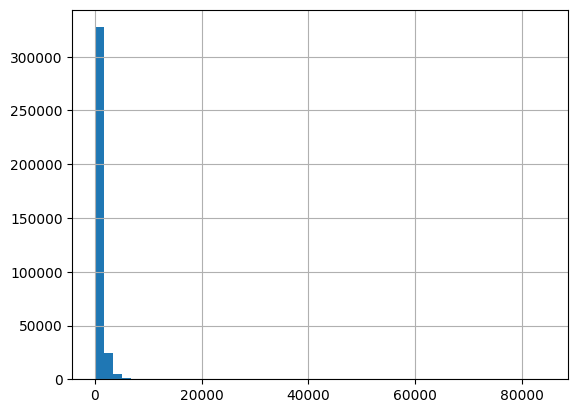

In [18]:
visits['session_lenght'].hist(bins = 50)

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

It is better after each section, graph (or series of tests) to write a conclusion on the obtained data taking into account the set business task - so it is easier to read the project, because future colleagues or customers will not have to interpret the results of each section, test or graph themselves.

#### here we see right skewed distribution, so as average will take median value to avoid  the influence of data outliers

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

I agree

In [19]:
visits['session_lenght'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_lenght, dtype: float64

#### average session lenght is 300 sec(5 min)

### return rate

In [20]:
# find the first session for each user
visits['session_first_date']=visits.groupby(['Uid'])['date'].transform('min')

In [21]:
# find cohort and age
visits['cohort'] = visits['session_first_date'].values.astype('datetime64[M]')
visits['age'] = ((pd.to_datetime(visits['date']) - pd.to_datetime(visits['session_first_date'])) / np.timedelta64(1,'M'))\
                                                                        .round().astype('int')
visits.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid       week      month        date  session_lenght  \
0  16879256277535980062 2017-12-14 2017-12-01  2017-12-20            1080   
1    104060357244891740 2018-02-15 2018-02-01  2018-02-19            1680   
2   7459035603376831527 2017-06-29 2017-07-01  2017-07-01               0   
3  16174680259334210214 2018-05-17 2018-05-01  2018-05-20            1440   
4   9969694820036681168 2017-12-21 2017-12-01  2017-12-27               0   

  session_first_date     cohort  age  
0         2017-12-20 2017-12-01    0  
1         2018-02-19 2018-02-01    0  
2         2017-07-01 2017-07-01    0  
3         2018-03-09 2018-03-01    2  
4         2017-12-27 2017-12-01    0

In [22]:
# how many users were active from certain cohorts on a certain time after registration
cohorts = visits.pivot_table(index='cohort',
                  columns='age',
                  values='Uid',
                  aggfunc='nunique').fillna(0)
cohorts

age              0       1       2       3      4      5      6      7   \
cohort                                                                    
2017-06-01  13259.0   976.0   718.0   805.0  910.0  891.0  844.0  743.0   
2017-07-01  13140.0   739.0   688.0   699.0  738.0  648.0  587.0  653.0   
2017-08-01  10181.0   702.0   633.0   598.0  517.0  436.0  418.0  350.0   
2017-09-01  16704.0  1264.0  1124.0   817.0  660.0  672.0  552.0  436.0   
2017-10-01  25977.0  1899.0  1376.0   987.0  938.0  815.0  548.0  467.0   
2017-11-01  27248.0  1873.0  1276.0  1043.0  854.0  660.0  504.0   75.0   
2017-12-01  25268.0  1288.0  1038.0   731.0  545.0  414.0   70.0    0.0   
2018-01-01  22624.0  1209.0   821.0   578.0  388.0   44.0    0.0    0.0   
2018-02-01  22197.0  1063.0   596.0   400.0   45.0    0.0    0.0    0.0   
2018-03-01  20589.0   852.0   516.0    76.0    0.0    0.0    0.0    0.0   
2018-04-01  15709.0   622.0    68.0     0.0    0.0    0.0    0.0    0.0   
2018-05-01  15273.0   100.0     0.0     0.0    0.0    0.0    0.0    0.0   

age            8      9      10     11     12  
cohort                                         
2017-06-01  738.0  666.0  547.0  534.0  167.0  
2017-07-01  483.0  389.0  315.0   72.0    0.0  
2017-08-01  295.0  238.0   29.0    0.0    0.0  
2017-09-01  331.0   43.0    0.0    0.0    0.0  
2017-10-01   84.0    0.0    0.0    0.0    0.0  
2017-11-01    0.0    0.0    0.0    0.0    0.0  
2017-12-01    0.0    0.0    0.0    0.0    0.0  
2018-01-01    0.0    0.0    0.0    0.0    0.0  
2018-02-01    0.0    0.0    0.0    0.0    0.0  
2018-03-01    0.0    0.0    0.0    0.0    0.0  
2018-04-01    0.0    0.0    0.0    0.0    0.0  
2018-05-01    0.0    0.0    0.0    0.0    0.0

#### here we can verify that the increase in activity from September to November is due to new users

In [23]:
# in%
retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

age          0         1         2         3         4         5         6   \
cohort                                                                        
2017-06-01  1.0  0.073610  0.054152  0.060713  0.068633  0.067200  0.063655   
2017-07-01  1.0  0.056240  0.052359  0.053196  0.056164  0.049315  0.044673   
2017-08-01  1.0  0.068952  0.062175  0.058737  0.050781  0.042825  0.041057   
2017-09-01  1.0  0.075670  0.067289  0.048910  0.039511  0.040230  0.033046   
2017-10-01  1.0  0.073103  0.052970  0.037995  0.036109  0.031374  0.021096   
2017-11-01  1.0  0.068739  0.046829  0.038278  0.031342  0.024222  0.018497   
2017-12-01  1.0  0.050974  0.041080  0.028930  0.021569  0.016384  0.002770   
2018-01-01  1.0  0.053439  0.036289  0.025548  0.017150  0.001945  0.000000   
2018-02-01  1.0  0.047889  0.026850  0.018020  0.002027  0.000000  0.000000   
2018-03-01  1.0  0.041381  0.025062  0.003691  0.000000  0.000000  0.000000   
2018-04-01  1.0  0.039595  0.004329  0.000000  0.000000  0.000000  0.000000   
2018-05-01  1.0  0.006548  0.000000  0.000000  0.000000  0.000000  0.000000   

age               7         8         9         10        11        12  
cohort                                                                  
2017-06-01  0.056037  0.055660  0.050230  0.041255  0.040275  0.012595  
2017-07-01  0.049696  0.036758  0.029604  0.023973  0.005479  0.000000  
2017-08-01  0.034378  0.028976  0.023377  0.002848  0.000000  0.000000  
2017-09-01  0.026102  0.019816  0.002574  0.000000  0.000000  0.000000  
2017-10-01  0.017977  0.003234  0.000000  0.000000  0.000000  0.000000  
2017-11-01  0.002752  0.000000  0.000000  0.000000  0.000000  0.000000  
2017-12-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-02-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-03-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-04-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-05-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000

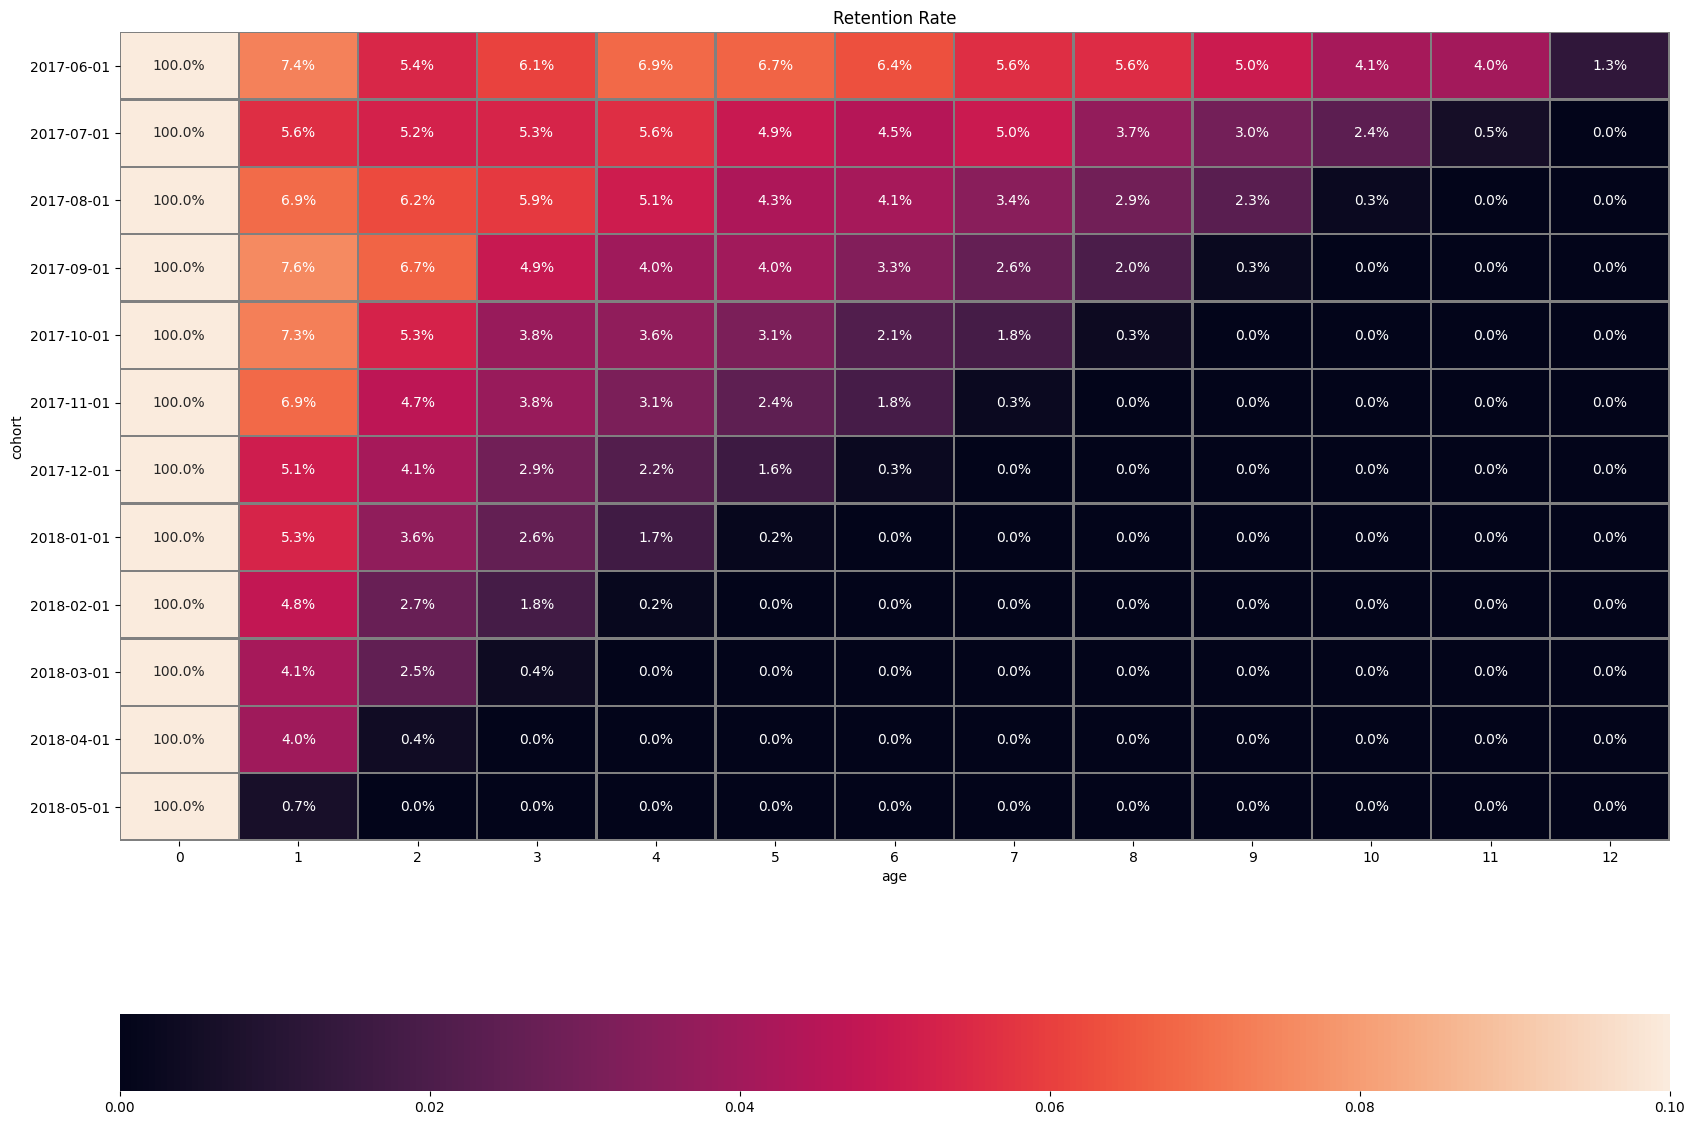

In [24]:
plt.figure(figsize=(20, 15))
retention.index=retention.index.astype(str)
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Retention Rate')
plt.show()

#### Here we can see that the june cohort has the best retension rate, it keeps 5% retention rate  on 9 month 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

## 2. Sales

### When do people start buying?

In [25]:
#import orders
try:
    orders = pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
orders

Buy Ts  Revenue                   Uid
0     2017-06-01 00:10:00    17.00  10329302124590727494
1     2017-06-01 00:25:00     0.55  11627257723692907447
2     2017-06-01 00:27:00     0.37  17903680561304213844
3     2017-06-01 00:29:00     0.55  16109239769442553005
4     2017-06-01 07:58:00     0.37  14200605875248379450
...                   ...      ...                   ...
50410 2018-05-31 23:50:00     4.64  12296626599487328624
50411 2018-05-31 23:50:00     5.80  11369640365507475976
50412 2018-05-31 23:54:00     0.30   1786462140797698849
50413 2018-05-31 23:56:00     3.67   3993697860786194247
50414 2018-06-01 00:02:00     3.42     83872787173869366

[50415 rows x 3 columns]

In [26]:
#checking missing values
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [27]:
#checking duplicates
orders.duplicated().sum()

0

there are no duplicates and missing values.

In [28]:
#find order first date
first_order=orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_order.columns = ['Uid', 'order_first_date']
first_order.head()

Uid    order_first_date
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00

In [29]:
#find visit first date
first_visit=visits.groupby('Uid')['date'].min().reset_index()
first_visit.columns=['Uid', 'visit_first_date']
first_visit.head()

Uid visit_first_date
0   11863502262781       2018-03-01
1   49537067089222       2018-02-06
2  297729379853735       2017-06-07
3  313578113262317       2017-09-18
4  325320750514679       2017-09-30

In [30]:
#merge first_order to first_visit
purchase=first_order.merge(first_visit, how = 'left', on=['Uid'])
purchase.head()

Uid    order_first_date visit_first_date
0   313578113262317 2018-01-03 21:51:00       2017-09-18
1  1575281904278712 2017-06-03 10:13:00       2017-06-03
2  2429014661409475 2017-10-11 18:33:00       2017-10-11
3  2464366381792757 2018-01-28 15:54:00       2018-01-27
4  2551852515556206 2017-11-24 10:14:00       2017-11-24

In [31]:
#calculate average conversion time
purchase['conversion']=((pd.to_datetime(purchase['order_first_date'])-pd.to_datetime(purchase['visit_first_date']))/np.timedelta64(1,'D')).astype('int')
purchase.head()

Uid    order_first_date visit_first_date  conversion
0   313578113262317 2018-01-03 21:51:00       2017-09-18         107
1  1575281904278712 2017-06-03 10:13:00       2017-06-03           0
2  2429014661409475 2017-10-11 18:33:00       2017-10-11           0
3  2464366381792757 2018-01-28 15:54:00       2018-01-27           1
4  2551852515556206 2017-11-24 10:14:00       2017-11-24           0

In [32]:
fig = px.histogram(purchase, x="conversion",nbins=50)
fig.show()

#### here we see right skewed distribution, so as average will take median value to avoid  the influence of data outliers

In [33]:
purchase.conversion.describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion, dtype: float64

In [34]:
purchase['conversion'].value_counts(normalize=True)

0      0.685568
1      0.053829
2      0.018755
3      0.012376
4      0.010569
         ...   
314    0.000027
309    0.000027
299    0.000027
358    0.000027
341    0.000027
Name: conversion, Length: 349, dtype: float64

#### on average it takes 0 day to convert, almost 70% of users make their first purchase on first visit.

In [35]:
overall_conversion = (purchase['Uid'].nunique()/visits['Uid'].nunique())*100
overall_conversion

16.006994815246596

 #### The overall conversion is 16%

### How many orders do they make during a given period of time?

In [36]:
# extract first order month and order month
orders['order_first_month']= orders.groupby('Uid')['Buy Ts'].transform('min').values.astype('datetime64[M]')
orders['order_month']=orders['Buy Ts'].values.astype('datetime64[M]')
orders.head()

Buy Ts  Revenue                   Uid order_first_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017-06-01   

  order_month  
0  2017-06-01  
1  2017-06-01  
2  2017-06-01  
3  2017-06-01  
4  2017-06-01

In [37]:
orders.order_first_month.value_counts()

2017-10-01    6005
2017-11-01    5900
2017-12-01    5894
2018-03-01    4484
2018-02-01    4470
2017-06-01    4438
2018-01-01    4308
2017-09-01    3878
2018-05-01    3249
2017-07-01    2910
2018-04-01    2690
2017-08-01    2188
2018-06-01       1
Name: order_first_month, dtype: int64

In [38]:
#drop 1 purchase in june 2018
orders=orders[orders['order_first_month']!='2018-06-01']
orders.order_first_month.value_counts()

2017-10-01    6005
2017-11-01    5900
2017-12-01    5894
2018-03-01    4484
2018-02-01    4470
2017-06-01    4438
2018-01-01    4308
2017-09-01    3878
2018-05-01    3249
2017-07-01    2910
2018-04-01    2690
2017-08-01    2188
Name: order_first_month, dtype: int64

In [39]:
#define cohort size.
cohort_sizes = orders.groupby('order_first_month')['Uid'].nunique().reset_index()
cohort_sizes.columns=['order_first_month','cohort_size']
cohort_sizes.head()

order_first_month  cohort_size
0        2017-06-01         2023
1        2017-07-01         1923
2        2017-08-01         1370
3        2017-09-01         2581
4        2017-10-01         4340

In [40]:
#making cohorts
cohort=orders.groupby(['order_first_month','order_month'])['Revenue'].count().reset_index()
cohort.columns=['order_first_month','order_month','orders']
cohort.head()

order_first_month order_month  orders
0        2017-06-01  2017-06-01    2354
1        2017-06-01  2017-07-01     177
2        2017-06-01  2017-08-01     174
3        2017-06-01  2017-09-01     226
4        2017-06-01  2017-10-01     292

In [41]:
#merge cohort with cohort size
cohort=cohort.merge(cohort_sizes,on=['order_first_month'])
cohort['age_month'] = ((cohort['order_month'] - cohort['order_first_month']) / np.timedelta64(1,'M')).round().astype('int')
cohort['orders_per_buyer']=cohort['orders']/cohort['cohort_size']
cohort.head()

order_first_month order_month  orders  cohort_size  age_month  \
0        2017-06-01  2017-06-01    2354         2023          0   
1        2017-06-01  2017-07-01     177         2023          1   
2        2017-06-01  2017-08-01     174         2023          2   
3        2017-06-01  2017-09-01     226         2023          3   
4        2017-06-01  2017-10-01     292         2023          4   

   orders_per_buyer  
0          1.163618  
1          0.087494  
2          0.086011  
3          0.111715  
4          0.144340

In [42]:
#making cohort analysis on orders_per_buyer
cohort_piv=cohort.pivot_table(
    index='order_first_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
)

cohort_piv.round(2).fillna(0)

age_month            0     1     2     3     4     5     6     7     8     9   \
order_first_month                                                               
2017-06-01         1.16  0.09  0.09  0.11  0.14  0.11  0.14  0.09  0.10  0.08   
2017-07-01         1.14  0.05  0.06  0.05  0.04  0.04  0.03  0.03  0.03  0.01   
2017-08-01         1.12  0.08  0.07  0.06  0.06  0.05  0.04  0.06  0.03  0.03   
2017-09-01         1.14  0.08  0.06  0.06  0.03  0.04  0.04  0.02  0.02  0.00   
2017-10-01         1.14  0.07  0.04  0.03  0.03  0.02  0.02  0.03  0.00  0.00   
2017-11-01         1.18  0.10  0.04  0.05  0.03  0.01  0.02  0.00  0.00  0.00   
2017-12-01         1.15  0.06  0.05  0.04  0.02  0.02  0.00  0.00  0.00  0.00   
2018-01-01         1.12  0.07  0.05  0.02  0.02  0.00  0.00  0.00  0.00  0.00   
2018-02-01         1.12  0.06  0.02  0.02  0.00  0.00  0.00  0.00  0.00  0.00   
2018-03-01         1.17  0.05  0.05  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2018-04-01         1.10  0.09  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2018-05-01         1.09  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

age_month            10    11  
order_first_month              
2017-06-01         0.05  0.04  
2017-07-01         0.03  0.00  
2017-08-01         0.00  0.00  
2017-09-01         0.00  0.00  
2017-10-01         0.00  0.00  
2017-11-01         0.00  0.00  
2017-12-01         0.00  0.00  
2018-01-01         0.00  0.00  
2018-02-01         0.00  0.00  
2018-03-01         0.00  0.00  
2018-04-01         0.00  0.00  
2018-05-01         0.00  0.00

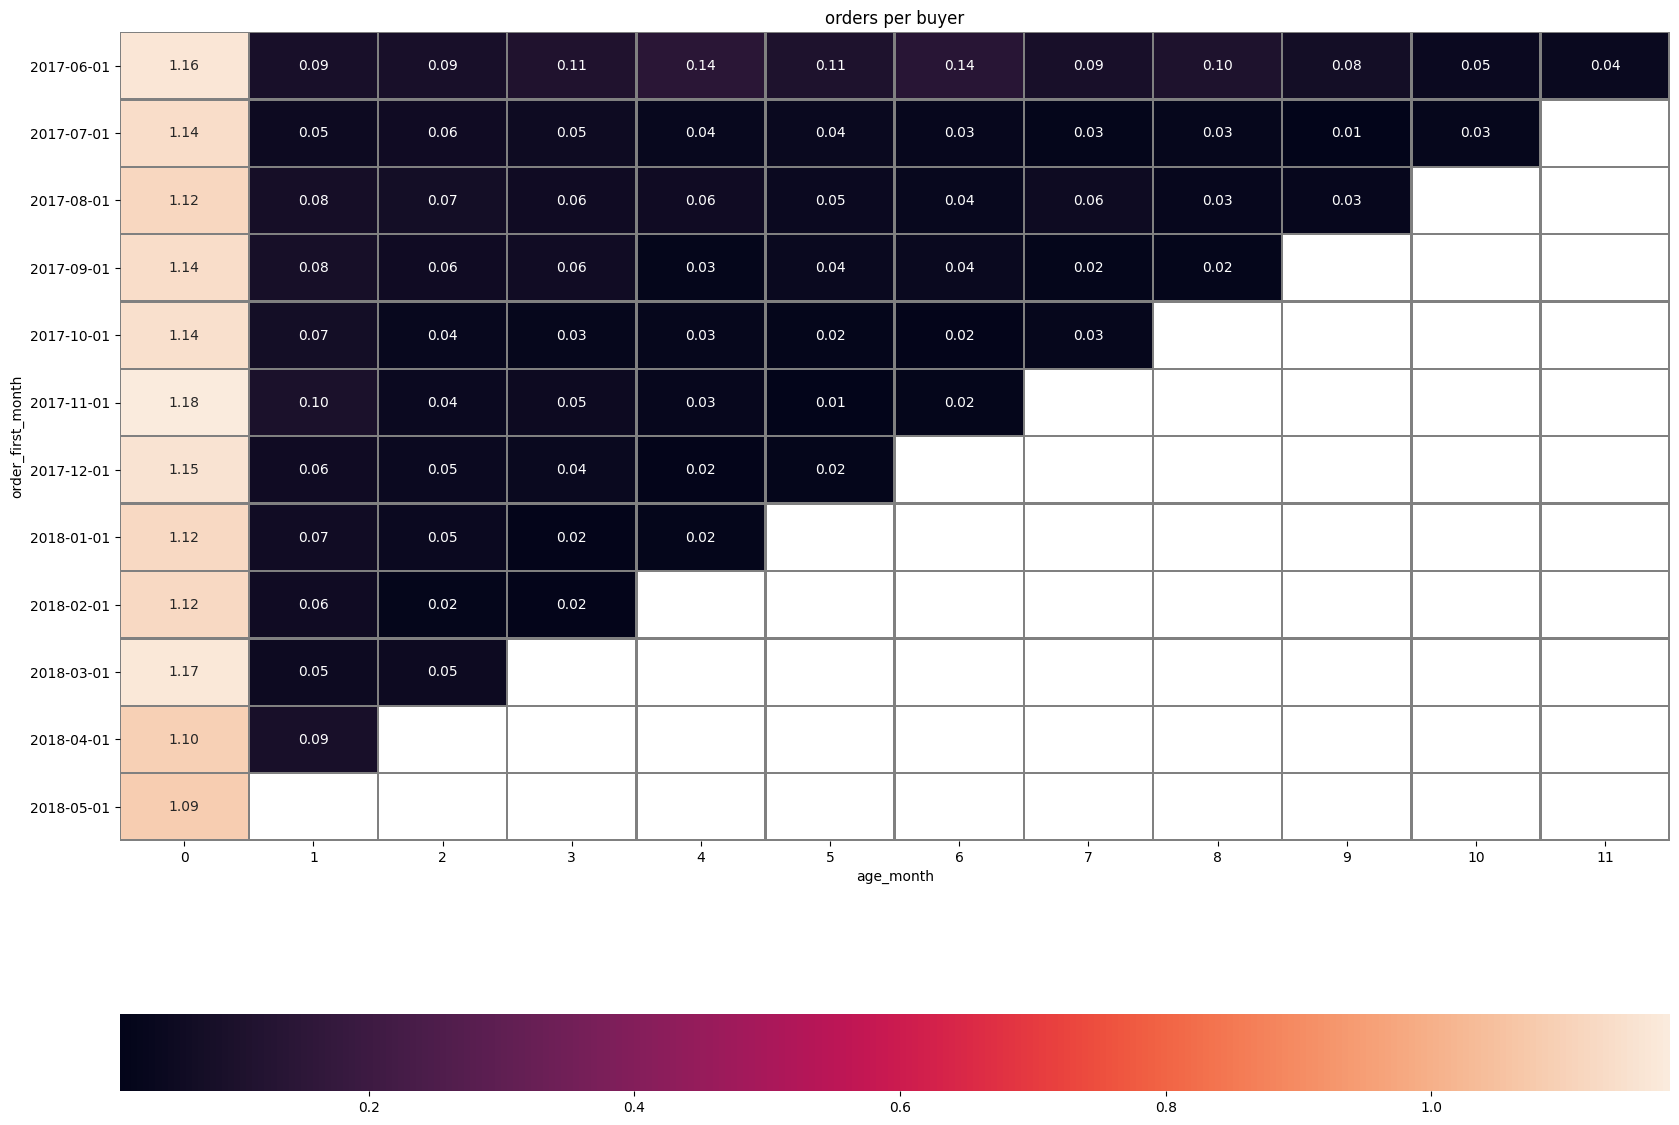

In [43]:
plt.figure(figsize=(20, 15))
cohort_piv.index=cohort_piv.index.astype(str)
sns.heatmap(cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'orders per buyer')
plt.show()

In [44]:
# cumulative sum
cohort_piv_cumsum=cohort.pivot_table(
    index='order_first_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_piv.round(2).fillna(0)

age_month            0     1     2     3     4     5     6     7     8     9   \
order_first_month                                                               
2017-06-01         1.16  0.09  0.09  0.11  0.14  0.11  0.14  0.09  0.10  0.08   
2017-07-01         1.14  0.05  0.06  0.05  0.04  0.04  0.03  0.03  0.03  0.01   
2017-08-01         1.12  0.08  0.07  0.06  0.06  0.05  0.04  0.06  0.03  0.03   
2017-09-01         1.14  0.08  0.06  0.06  0.03  0.04  0.04  0.02  0.02  0.00   
2017-10-01         1.14  0.07  0.04  0.03  0.03  0.02  0.02  0.03  0.00  0.00   
2017-11-01         1.18  0.10  0.04  0.05  0.03  0.01  0.02  0.00  0.00  0.00   
2017-12-01         1.15  0.06  0.05  0.04  0.02  0.02  0.00  0.00  0.00  0.00   
2018-01-01         1.12  0.07  0.05  0.02  0.02  0.00  0.00  0.00  0.00  0.00   
2018-02-01         1.12  0.06  0.02  0.02  0.00  0.00  0.00  0.00  0.00  0.00   
2018-03-01         1.17  0.05  0.05  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2018-04-01         1.10  0.09  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2018-05-01         1.09  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

age_month            10    11  
order_first_month              
2017-06-01         0.05  0.04  
2017-07-01         0.03  0.00  
2017-08-01         0.00  0.00  
2017-09-01         0.00  0.00  
2017-10-01         0.00  0.00  
2017-11-01         0.00  0.00  
2017-12-01         0.00  0.00  
2018-01-01         0.00  0.00  
2018-02-01         0.00  0.00  
2018-03-01         0.00  0.00  
2018-04-01         0.00  0.00  
2018-05-01         0.00  0.00

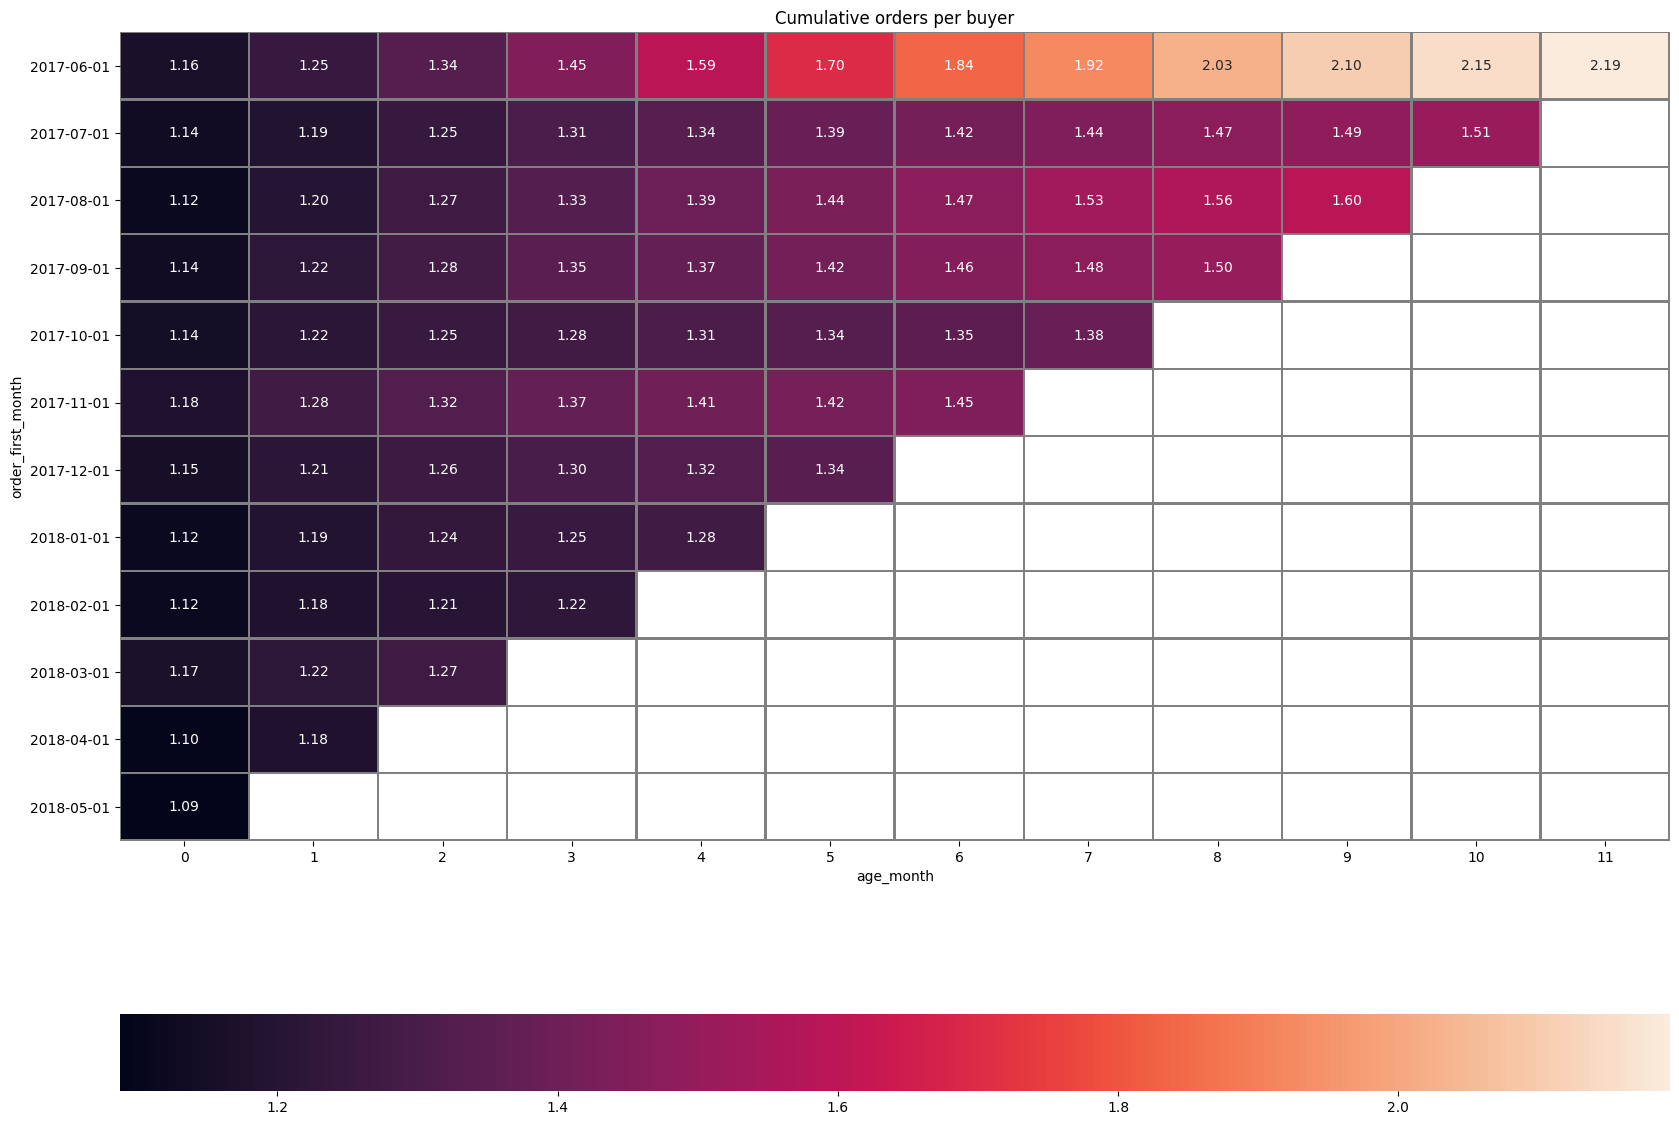

In [45]:
plt.figure(figsize=(20, 15))
cohort_piv_cumsum.index=cohort_piv_cumsum.index.astype(str)
sns.heatmap(cohort_piv_cumsum, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Cumulative orders per buyer')
plt.show()

#### Here we see that june cohort outrunning the others in term of cumulative amount of purchases per user.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Well done

### What is the average purchase size?

In [46]:
orders.Revenue.describe()

count    50414.000000
mean         4.999678
std         21.818574
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

In [47]:
# plotting total check for each order (in data we don't have order id, so 1 row = 1 order)
fig = px.histogram(orders, x="Revenue",nbins=30)
fig.show()

#### the average purchase size is 2,5 $

#### Cohort analysis on average check

In [48]:
avg_cohort=orders.groupby(['order_first_month','order_month'])['Revenue'].mean().reset_index()
avg_cohort.columns=['order_first_month', 'order_month', 'Avg_check']
avg_cohort['age_month'] = ((avg_cohort['order_month'] - avg_cohort['order_first_month']) / np.timedelta64(1,'M')).round().astype('int')
avg_cohort.head()

order_first_month order_month  Avg_check  age_month
0        2017-06-01  2017-06-01   4.060106          0
1        2017-06-01  2017-07-01   5.547006          1
2        2017-06-01  2017-08-01   5.088161          2
3        2017-06-01  2017-09-01   8.545575          3
4        2017-06-01  2017-10-01   7.084178          4

In [49]:
avg_cohort_piv=avg_cohort.pivot_table(
    index='order_first_month', 
    columns='age_month', 
    values='Avg_check', 
    aggfunc='mean'
)

avg_cohort_piv.round(2).fillna('')

age_month            0      1      2      3      4      5      6      7   \
order_first_month                                                          
2017-06-01         4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76   
2017-07-01         5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45   
2017-08-01         4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   
2017-09-01         4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21   
2017-10-01         4.37   7.41   5.13   5.59    5.1   5.07   4.28   4.01   
2017-11-01         4.37    4.1   4.47   6.28   4.44   3.73    4.6          
2017-12-01         4.11   4.23  20.07  26.08  15.95  14.11                 
2018-01-01         3.69   4.44   6.45   7.52   2.71                        
2018-02-01         3.71   4.58   3.45   3.87                               
2018-03-01         4.14   5.97   6.33                                      
2018-04-01         4.25    6.2                                             
2018-05-01         4.29                                                    

age_month            8      9      10    11  
order_first_month                            
2017-06-01         5.28   8.01  12.04  6.04  
2017-07-01         5.35  11.79   5.65        
2017-08-01          8.7    5.6               
2017-09-01         7.79                      
2017-10-01                                   
2017-11-01                                   
2017-12-01                                   
2018-01-01                                   
2018-02-01                                   
2018-03-01                                   
2018-04-01                                   
2018-05-01

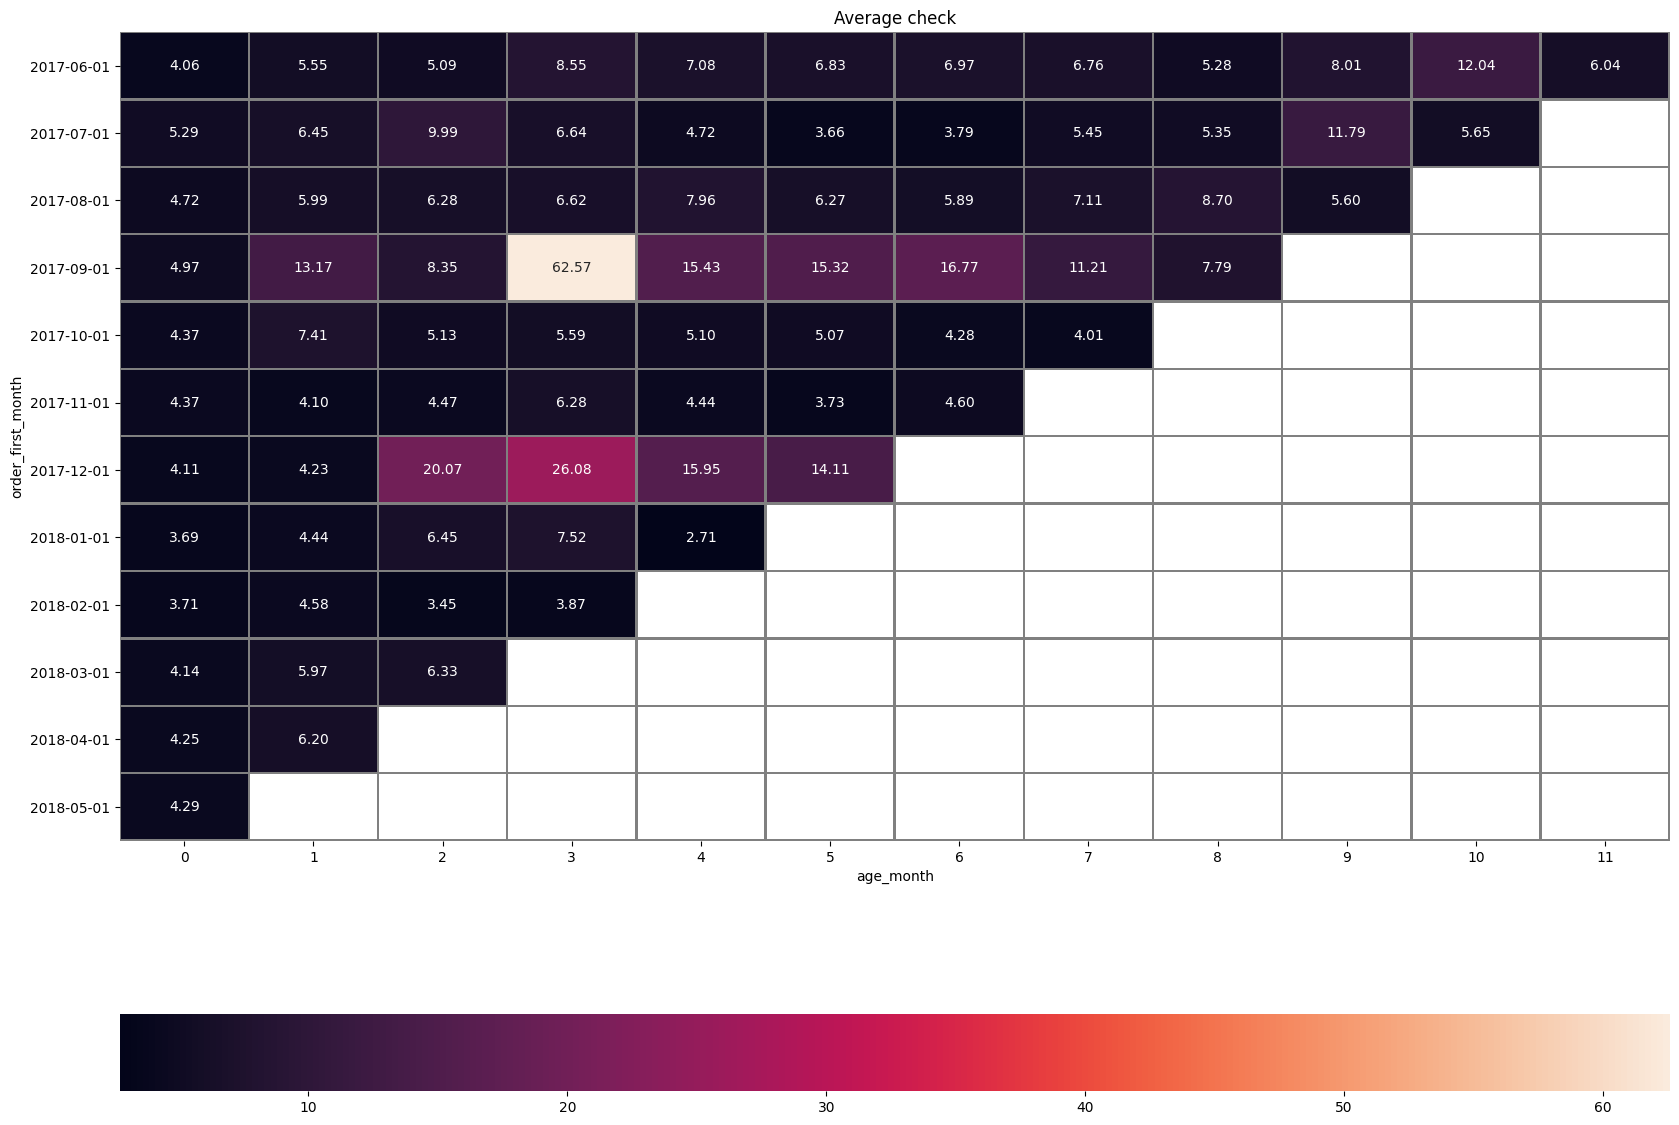

In [50]:
plt.figure(figsize=(20, 15))
avg_cohort_piv.index=avg_cohort_piv.index.astype(str)
sns.heatmap(avg_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Average check')
plt.show()

In [51]:
#calculating overall avg check per buyer
overall_avg_check = orders['Revenue'].sum()/orders['Uid'].count()
overall_avg_check

4.9996782639742925

#### Here we can see:
#### - the average purchase size is 2,5 
#### - overall avg check  5
#### - hight avg check in september and december cohorts

### How much money do they bring? (LTV)

In [52]:
#calculate total LTV
Total_ltv = orders.Revenue.sum()/orders.Uid.nunique()
Total_ltv

6.901423251738677

In [53]:
#get the revenue per cohort in each month
ltv_cohort=orders.groupby(['order_first_month','order_month'])['Revenue'].sum().reset_index()
#merge with the cohort size
ltv_cohort=ltv_cohort.merge(cohort_sizes,on=['order_first_month'])
ltv_cohort['age']=((ltv_cohort['order_month'] - ltv_cohort['order_first_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv_cohort['ltv']=ltv_cohort['Revenue']/ltv_cohort['cohort_size']
ltv_cohort

order_first_month order_month   Revenue  cohort_size  age       ltv
0         2017-06-01  2017-06-01   9557.49         2023    0  4.724414
1         2017-06-01  2017-07-01    981.82         2023    1  0.485329
2         2017-06-01  2017-08-01    885.34         2023    2  0.437637
3         2017-06-01  2017-09-01   1931.30         2023    3  0.954671
4         2017-06-01  2017-10-01   2068.58         2023    4  1.022531
..               ...         ...       ...          ...  ...       ...
73        2018-03-01  2018-04-01   1063.05         3533    1  0.300892
74        2018-03-01  2018-05-01   1114.87         3533    2  0.315559
75        2018-04-01  2018-04-01  10600.69         2276    0  4.657597
76        2018-04-01  2018-05-01   1209.92         2276    1  0.531599
77        2018-05-01  2018-05-01  13925.76         2988    0  4.660562

[78 rows x 6 columns]

In [54]:
ltv_cohort_piv=ltv_cohort.pivot_table(
    index='order_first_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)
ltv_cohort_piv

age                      0         1         2          3          4   \
order_first_month                                                       
2017-06-01         4.724414  5.209743  5.647380   6.602051   7.624582   
2017-07-01         6.010218  6.345429  6.968960   7.327936   7.504727   
2017-08-01         5.276518  5.748511  6.206993   6.598270   7.092321   
2017-09-01         5.644529  6.762115  7.283045  11.258838  11.659396   
2017-10-01         5.003733  5.539495  5.730889   5.888035   6.039594   
2017-11-01         5.154683  5.553916  5.753472   6.078424   6.226437   
2017-12-01         4.738191  4.998565  5.923662   6.988937   7.301866   
2018-01-01         4.135636  4.430394  4.734675   4.877453   4.940151   
2018-02-01         4.156987  4.435262  4.513777   4.587921        NaN   
2018-03-01         4.838803  5.139694  5.455253        NaN        NaN   
2018-04-01         4.657597  5.189196       NaN        NaN        NaN   
2018-05-01         4.660562       NaN       NaN        NaN        NaN   

age                       5          6          7          8          9   \
order_first_month                                                          
2017-06-01          8.360084   9.310524   9.892116  10.445329  11.051117   
2017-07-01          7.660775   7.780983   7.922803   8.084035   8.231180   
2017-08-01          7.375861   7.586526   7.991533   8.283745   8.471723   
2017-09-01         12.306463  13.008071  13.251220  13.435227        NaN   
2017-10-01          6.159956   6.244772   6.360242        NaN        NaN   
2017-11-01          6.280316   6.395244        NaN        NaN        NaN   
2017-12-01          7.639913        NaN        NaN        NaN        NaN   
2018-01-01               NaN        NaN        NaN        NaN        NaN   
2018-02-01               NaN        NaN        NaN        NaN        NaN   
2018-03-01               NaN        NaN        NaN        NaN        NaN   
2018-04-01               NaN        NaN        NaN        NaN        NaN   
2018-05-01               NaN        NaN        NaN        NaN        NaN   

age                       10         11  
order_first_month                        
2017-06-01         11.622378  11.879234  
2017-07-01          8.386854        NaN  
2017-08-01               NaN        NaN  
2017-09-01               NaN        NaN  
2017-10-01               NaN        NaN  
2017-11-01               NaN        NaN  
2017-12-01               NaN        NaN  
2018-01-01               NaN        NaN  
2018-02-01               NaN        NaN  
2018-03-01               NaN        NaN  
2018-04-01               NaN        NaN  
2018-05-01               NaN        NaN

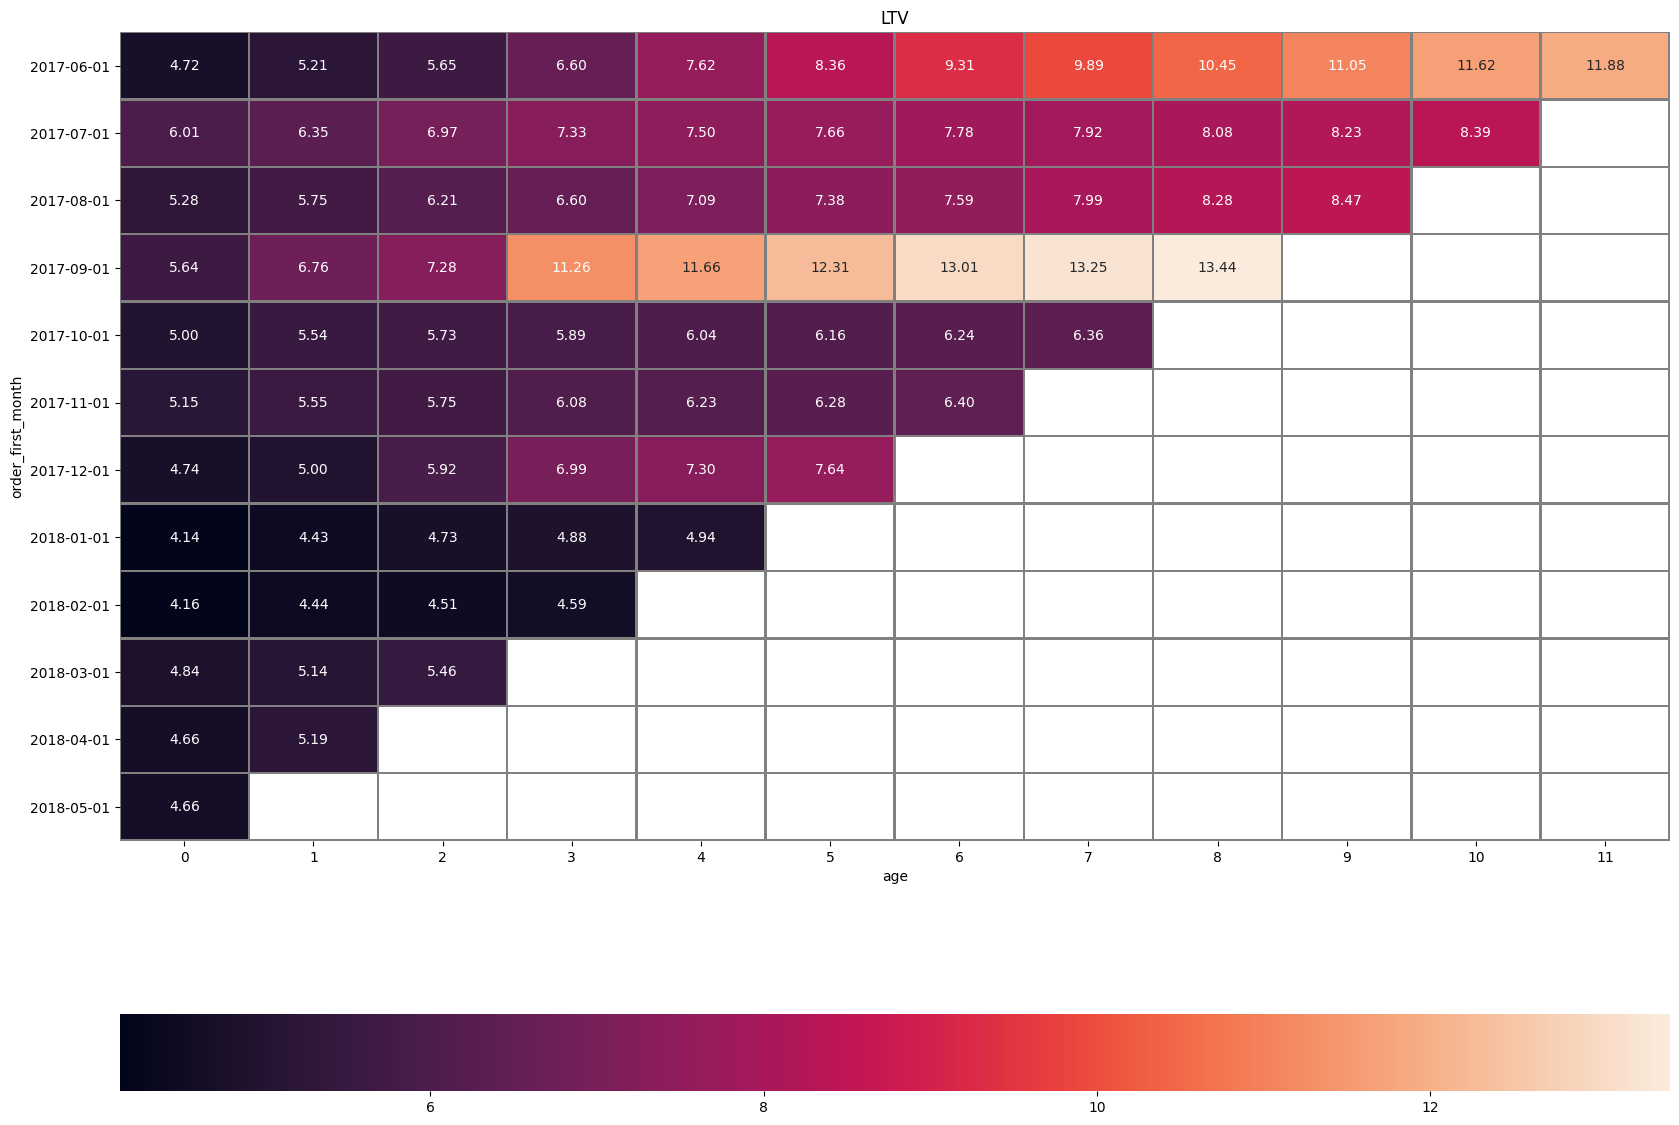

In [55]:
plt.figure(figsize=(20, 15))
ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'LTV')
plt.show()

#### Here we see that june and september cohorts outrunning the others in term of LTV.¶

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great!)

## 3.Marketing

### How much money was spent? Overall, per source and over time.

In [56]:
# import costs
try:
    costs = pd.read_csv('costs_us.csv', parse_dates=['dt'])
except:
    costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])
costs.head()

source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

In [57]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [58]:
costs.duplicated().sum()

0

there are no duplicates and missing values.

In [59]:
costs=costs.sort_values(by=['dt','source_id'])
costs.head()

source_id         dt   costs
0             1 2017-06-01   75.20
363           2 2017-06-01  132.56
726           3 2017-06-01  349.38
1089          4 2017-06-01   76.74
1452          5 2017-06-01   73.24

In [60]:
costs['costs'].sum()

329131.62

#### Total marketing cost is 329131.62

In [61]:
# how costs  split across sources
costs_per_source=costs.groupby(['source_id'])['costs'].sum().reset_index()
costs_per_source

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

In [62]:
#plotting costs over time
fig = px.line(costs, x="dt", y="costs", color='source_id')
fig.show()

In [63]:
orders.head()


Buy Ts  Revenue                   Uid order_first_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017-06-01   

  order_month  
0  2017-06-01  
1  2017-06-01  
2  2017-06-01  
3  2017-06-01  
4  2017-06-01

In [64]:
costs['month'] = costs['dt'].values.astype('datetime64[M]')
costs.head()

source_id         dt   costs      month
0             1 2017-06-01   75.20 2017-06-01
363           2 2017-06-01  132.56 2017-06-01
726           3 2017-06-01  349.38 2017-06-01
1089          4 2017-06-01   76.74 2017-06-01
1452          5 2017-06-01   73.24 2017-06-01

In [65]:
source_costs_by_month = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()
source_costs_by_month

month  source_id    costs
0  2017-06-01          1  1125.61
1  2017-06-01          2  2427.38
2  2017-06-01          3  7731.65
3  2017-06-01          4  3514.80
4  2017-06-01          5  2616.12
..        ...        ...      ...
79 2018-05-01          3  9411.42
80 2018-05-01          4  4214.21
81 2018-05-01          5  3669.56
82 2018-05-01          9   362.17
83 2018-05-01         10   409.86

[84 rows x 3 columns]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b> this is costs by source by month   </b>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Well done

In [66]:
#plotting costs over time (month)
fig = px.line(source_costs_by_month, x="month", y="costs", color='source_id')
fig.show()

#### Here we see the most expensive source is third sourse. Costs on marketing third source start increasing from september to november and then slowly goes down. The same happens with other sources, but costs are much less.  Also we see, that dynamics of marketing costs corresponds to user activity. 

In [67]:
visits.groupby('Uid')["Source Id"].nunique().sort_values()

Uid
11863502262781          1
11731261366732678012    1
11731363928319253464    1
11731538822080018399    1
11731632440555246055    1
                       ..
14481163132396345939    7
8667719997796727944     7
5603453646174104178     7
17030528792926543083    7
1242922364974949363     7
Name: Source Id, Length: 228169, dtype: int64

#### Not all users have one source, number of unique sources varies from 1 to 7

In [68]:
# define the first source they came from as the main source
first_source=visits.sort_values('date').groupby('Uid').first()["Source Id"].reset_index()
first_source.columns=['Uid','first_source']
first_source.head()

Uid  first_source
0   11863502262781             3
1   49537067089222             2
2  297729379853735             3
3  313578113262317             2
4  325320750514679             5

In [69]:
orders=orders.merge(first_source,on=['Uid'],how='left')
orders.head()

Buy Ts  Revenue                   Uid order_first_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017-06-01   

  order_month  first_source  
0  2017-06-01             1  
1  2017-06-01             2  
2  2017-06-01             2  
3  2017-06-01             2  
4  2017-06-01             3

In [70]:
source_revenue_by_month = orders.groupby(['order_first_month', 'first_source'])['Revenue'].sum().reset_index()
fig = px.line(source_revenue_by_month, x="order_first_month", y="Revenue", color = 'first_source')
fig.show()

#### here we see that in terms of revenue, the fifth and second sources worked best in September and December respectively

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There is no "costs by source by month" chart. Please add

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b> previous chart is costs by source by month or  I misunderstood something   </b>

### How much did customer acquisition from each of the sources cost?

In [71]:
#calculate total CAC
Total_CAC = costs.costs.sum()/orders.Uid.nunique()
Total_CAC

9.011872843765401

In [72]:
costs_by_month = costs.groupby(['month'])['costs'].sum().reset_index()
costs_by_month.head()

month     costs
0 2017-06-01  18015.00
1 2017-07-01  18240.59
2 2017-08-01  14790.54
3 2017-09-01  24368.91
4 2017-10-01  36322.88

In [73]:
orders.head()

Buy Ts  Revenue                   Uid order_first_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017-06-01   

  order_month  first_source  
0  2017-06-01             1  
1  2017-06-01             2  
2  2017-06-01             2  
3  2017-06-01             2  
4  2017-06-01             3

In [74]:
buyers_per_month = orders.groupby('order_first_month')['Uid'].nunique().reset_index()
buyers_per_month.columns=['month','buyers']
buyers_per_month

month  buyers
0  2017-06-01    2023
1  2017-07-01    1923
2  2017-08-01    1370
3  2017-09-01    2581
4  2017-10-01    4340
5  2017-11-01    4081
6  2017-12-01    4383
7  2018-01-01    3373
8  2018-02-01    3651
9  2018-03-01    3533
10 2018-04-01    2276
11 2018-05-01    2988

In [75]:
CAC_per_month=costs_by_month.merge(buyers_per_month,how='left',on=['month'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month.head()

month     costs  buyers        CAC
0 2017-06-01  18015.00    2023   8.905091
1 2017-07-01  18240.59    1923   9.485486
2 2017-08-01  14790.54    1370  10.796015
3 2017-09-01  24368.91    2581   9.441654
4 2017-10-01  36322.88    4340   8.369327

In [76]:
orders.head()

Buy Ts  Revenue                   Uid order_first_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017-06-01   

  order_month  first_source  
0  2017-06-01             1  
1  2017-06-01             2  
2  2017-06-01             2  
3  2017-06-01             2  
4  2017-06-01             3

In [77]:
#calculate total revenue
Total_revenue = orders.Revenue.sum()
Total_revenue

252053.77999999997

In [78]:
#calculate LTV per month to compare LTV and CAC
LTV_per_month = orders.groupby('order_first_month').agg({'Revenue': 'sum', 'Uid': 'nunique'}).reset_index()
LTV_per_month['LTV'] = LTV_per_month['Revenue']/LTV_per_month['Uid']
LTV_per_month

order_first_month   Revenue   Uid        LTV
0         2017-06-01  24031.69  2023  11.879234
1         2017-07-01  16127.92  1923   8.386854
2         2017-08-01  11606.26  1370   8.471723
3         2017-09-01  34676.32  2581  13.435227
4         2017-10-01  27603.45  4340   6.360242
5         2017-11-01  26098.99  4081   6.395244
6         2017-12-01  33485.74  4383   7.639913
7         2018-01-01  16663.13  3373   4.940151
8         2018-02-01  16750.50  3651   4.587921
9         2018-03-01  19273.41  3533   5.455253
10        2018-04-01  11810.61  2276   5.189196
11        2018-05-01  13925.76  2988   4.660562

In [79]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=CAC_per_month['month'], 
                        y=CAC_per_month['CAC'],
                    mode='lines',
                    name='CAC',line = dict(color='yellow', width=2 )))

fig.add_trace(go.Scatter(x=LTV_per_month['order_first_month'], 
                        y=LTV_per_month['LTV'], 
                       
                    mode='lines',
                    name='LTV',line = dict(color='black', width=2 )))


fig.update_layout(
    showlegend=True,
    plot_bgcolor="grey",
    margin=dict(t=10,l=10,b=10,r=10)
)


fig.show()

#### Here we clearly see that marketing costs mostly exceed revenue with the exception of june and september

#### Customer Acquisition Cost is not stable. Lets see how it splits per source.

### CAC per source

In [80]:
costs_by_month_source=costs.groupby(['month',"source_id"])['costs'].sum().reset_index()
costs_by_month_source.columns = ['month', 'source', 'costs']
costs_by_month_source.head()

month  source    costs
0 2017-06-01       1  1125.61
1 2017-06-01       2  2427.38
2 2017-06-01       3  7731.65
3 2017-06-01       4  3514.80
4 2017-06-01       5  2616.12

In [81]:
buyers_per_moth_source=orders.groupby(['order_first_month','first_source'])['Uid'].nunique().reset_index()
buyers_per_moth_source.columns=['month','source','buyers']
buyers_per_moth_source.head()

month  source  buyers
0 2017-06-01       1     213
1 2017-06-01       2     241
2 2017-06-01       3     616
3 2017-06-01       4     405
4 2017-06-01       5     389

In [82]:
#actual cac calculations
CAC_per_month_source=costs_by_month_source.merge(buyers_per_moth_source,how='left',on=['month','source'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

month  source    costs  buyers        CAC
0 2017-06-01       1  1125.61     213   5.284554
1 2017-06-01       2  2427.38     241  10.072116
2 2017-06-01       3  7731.65     616  12.551380
3 2017-06-01       4  3514.80     405   8.678519
4 2017-06-01       5  2616.12     389   6.725244

In [83]:
#plotting cac dynamics
fig = px.line(CAC_per_month_source, x="month", y="CAC",color='source',title='CAC')
fig.show()

#### The most expensive are third and second sources. Others varies from month to month.

### How worthwhile where the investments? (ROI)

In [84]:
Total_ROI = Total_ltv/Total_CAC
Total_ROI

0.7658145394842343

#### The overall ROI is 0,76

In [85]:
CAC_per_month_ROI=CAC_per_month[['month','CAC']]
CAC_per_month_ROI.columns=['order_first_month','CAC']
ROI=ltv_cohort.merge(CAC_per_month_ROI,on=['order_first_month'],how='left')
ROI.head()

order_first_month order_month  Revenue  cohort_size  age       ltv       CAC
0        2017-06-01  2017-06-01  9557.49         2023    0  4.724414  8.905091
1        2017-06-01  2017-07-01   981.82         2023    1  0.485329  8.905091
2        2017-06-01  2017-08-01   885.34         2023    2  0.437637  8.905091
3        2017-06-01  2017-09-01  1931.30         2023    3  0.954671  8.905091
4        2017-06-01  2017-10-01  2068.58         2023    4  1.022531  8.905091

In [86]:
ROI['ROI']=ROI['ltv']/ROI['CAC']
roi_piv = ROI.pivot_table(
    index='order_first_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2) 
roi_piv

age                  0     1     2     3     4     5     6     7     8     9   \
order_first_month                                                               
2017-06-01         0.53  0.59  0.63  0.74  0.86  0.94  1.05  1.11  1.17  1.24   
2017-07-01         0.63  0.67  0.73  0.77  0.79  0.81  0.82  0.84  0.85  0.87   
2017-08-01         0.49  0.53  0.57  0.61  0.66  0.68  0.70  0.74  0.77  0.78   
2017-09-01         0.60  0.72  0.77  1.19  1.23  1.30  1.38  1.40  1.42   NaN   
2017-10-01         0.60  0.66  0.68  0.70  0.72  0.74  0.75  0.76   NaN   NaN   
2017-11-01         0.55  0.60  0.62  0.65  0.67  0.68  0.69   NaN   NaN   NaN   
2017-12-01         0.54  0.57  0.68  0.80  0.84  0.87   NaN   NaN   NaN   NaN   
2018-01-01         0.42  0.45  0.48  0.49  0.50   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.46  0.49  0.50  0.51   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.56  0.60  0.63   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.48  0.53   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01         0.63   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

age                  10    11  
order_first_month              
2017-06-01         1.31  1.33  
2017-07-01         0.88   NaN  
2017-08-01          NaN   NaN  
2017-09-01          NaN   NaN  
2017-10-01          NaN   NaN  
2017-11-01          NaN   NaN  
2017-12-01          NaN   NaN  
2018-01-01          NaN   NaN  
2018-02-01          NaN   NaN  
2018-03-01          NaN   NaN  
2018-04-01          NaN   NaN  
2018-05-01          NaN   NaN

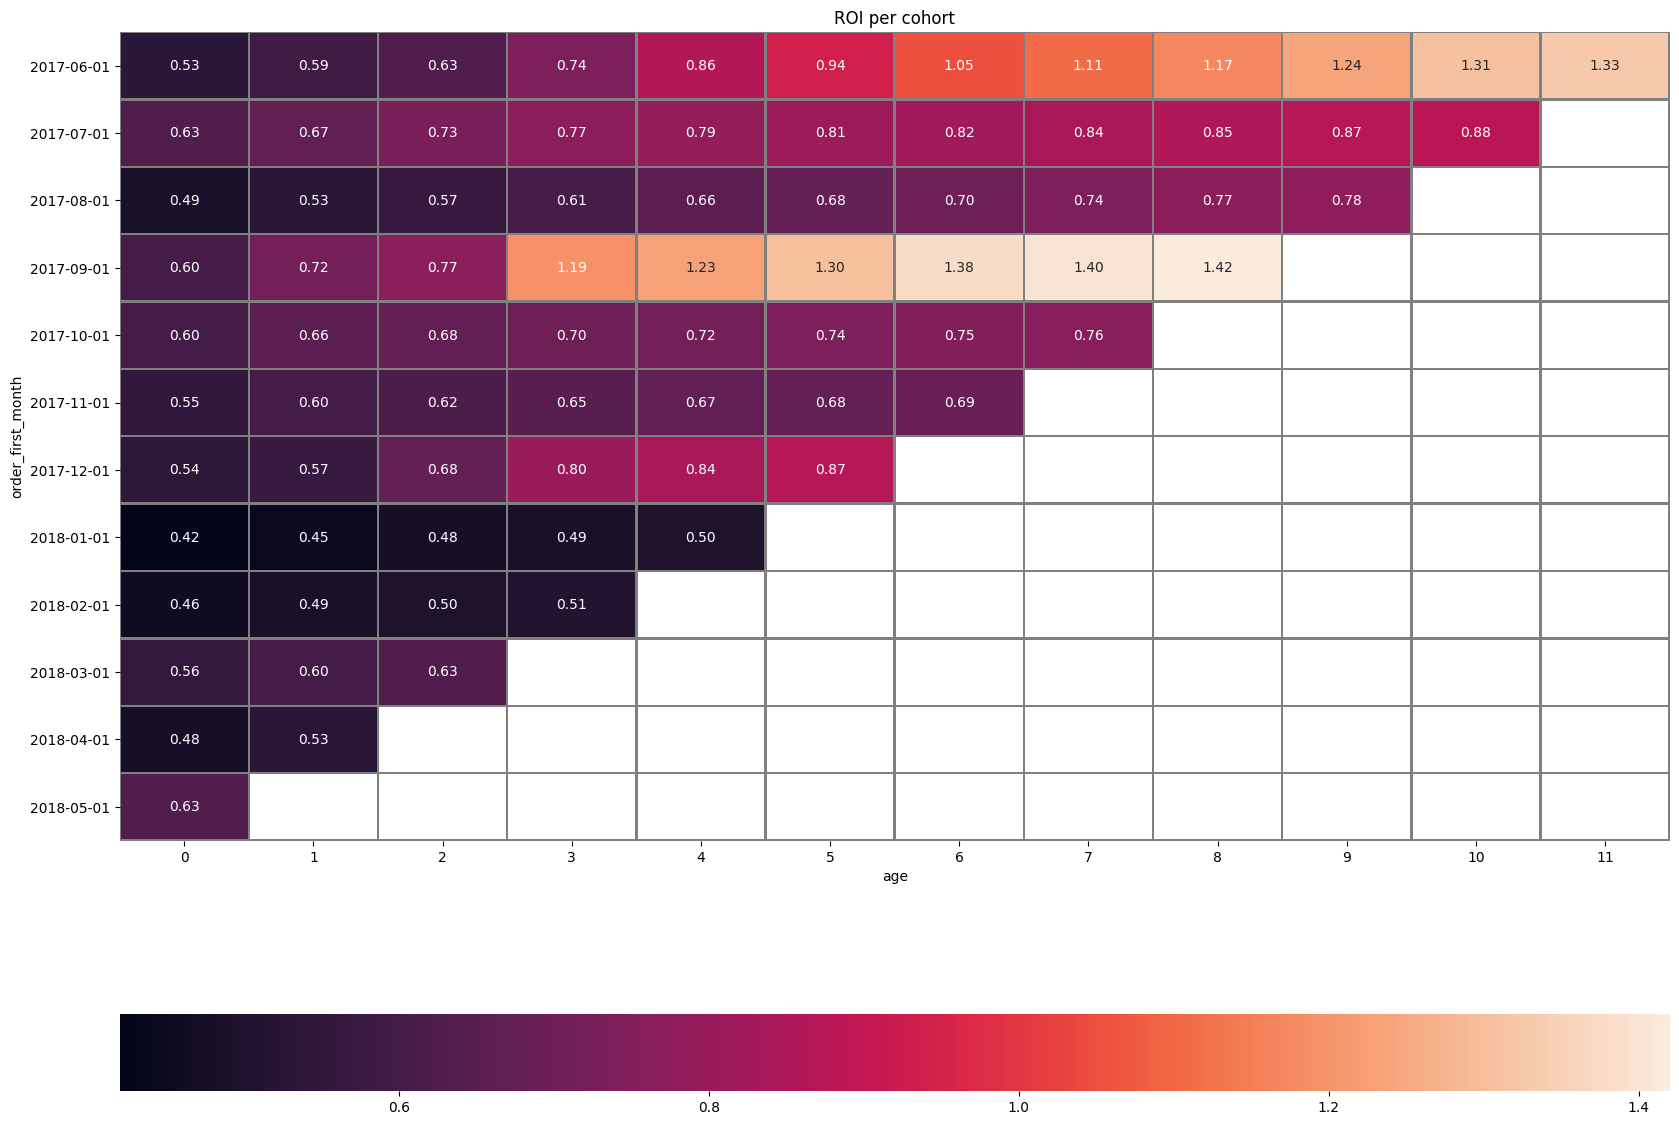

In [87]:
plt.figure(figsize=(20, 15))
roi_piv.index=roi_piv.index.astype(str)
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show()

#### Here we see that best ROI has september cohort (marketing costs began to pay off already in the fourth month), and also possitive result has june cohort (it passed break even on sixth month)

In [88]:
ltv_per_source=orders.groupby(['first_source'])[['Uid','Revenue']].agg({'Uid':'nunique','Revenue':'sum'}).reset_index()
ltv_per_source.columns=['source','buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source

source  buyers   revenue        ltv
0       1    3365  34797.27  10.340942
1       2    3556  45335.95  12.749142
2       3   10137  51958.06   5.125585
3       4    9998  55383.98   5.539506
4       5    7109  54442.14   7.658199
5       7       1      1.22   1.220000
6       9    1054   5538.50   5.254744
7      10    1302   4596.66   3.530461

In [89]:
costs_per_source.columns = ['source', 'costs']
roi_per_source=costs_per_source.merge(ltv_per_source,on=['source'])
roi_per_source['CAC']=roi_per_source['costs']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['CAC']
roi_per_source

source      costs  buyers   revenue        ltv        CAC      romi
0       1   20833.27    3365  34797.27  10.340942   6.191165  1.670274
1       2   42806.04    3556  45335.95  12.749142  12.037694  1.059102
2       3  141321.63   10137  51958.06   5.125585  13.941169  0.367658
3       4   61073.60    9998  55383.98   5.539506   6.108582  0.906840
4       5   51757.10    7109  54442.14   7.658199   7.280504  1.051878
5       9    5517.49    1054   5538.50   5.254744   5.234810  1.003808
6      10    5822.49    1302   4596.66   3.530461   4.471959  0.789466

In [90]:
fig = px.bar(roi_per_source, x='source', y='romi')
fig.update_xaxes(type='category')
fig.show()

#### Here we see that in general best ROMI has the first sourse and also second and fifth sourses have possitive result. Now lets see each  result of each source by cohort

In [91]:
orders.head()

Buy Ts  Revenue                   Uid order_first_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017-06-01   

  order_month  first_source  
0  2017-06-01             1  
1  2017-06-01             2  
2  2017-06-01             2  
3  2017-06-01             2  
4  2017-06-01             3

In [92]:
CAC_per_month_source.head()

month  source    costs  buyers        CAC
0 2017-06-01       1  1125.61     213   5.284554
1 2017-06-01       2  2427.38     241  10.072116
2 2017-06-01       3  7731.65     616  12.551380
3 2017-06-01       4  3514.80     405   8.678519
4 2017-06-01       5  2616.12     389   6.725244

In [93]:
LTV_month_source = orders.groupby(['order_first_month', 'first_source']).agg({'Uid':'nunique','Revenue':'sum'}).reset_index()
LTV_month_source.head()

order_first_month  first_source  Uid  Revenue
0        2017-06-01             1  213  4948.11
1        2017-06-01             2  241  3967.58
2        2017-06-01             3  616  3531.76
3        2017-06-01             4  405  5090.05
4        2017-06-01             5  389  5825.21

In [94]:
LTV_month_source['LTV'] = LTV_month_source['Revenue']/LTV_month_source['Uid']
LTV_month_source.columns = ['month', 'source', 'Num_Uid', 'Revenue', 'LTV']
LTV_month_source.head()

month  source  Num_Uid  Revenue        LTV
0 2017-06-01       1      213  4948.11  23.230563
1 2017-06-01       2      241  3967.58  16.462988
2 2017-06-01       3      616  3531.76   5.733377
3 2017-06-01       4      405  5090.05  12.568025
4 2017-06-01       5      389  5825.21  14.974833

In [95]:
ROMI_month_source = LTV_month_source.merge(CAC_per_month_source,on=['month', 'source'],how='left')
ROMI_month_source.head()

month  source  Num_Uid  Revenue        LTV    costs  buyers        CAC
0 2017-06-01       1      213  4948.11  23.230563  1125.61   213.0   5.284554
1 2017-06-01       2      241  3967.58  16.462988  2427.38   241.0  10.072116
2 2017-06-01       3      616  3531.76   5.733377  7731.65   616.0  12.551380
3 2017-06-01       4      405  5090.05  12.568025  3514.80   405.0   8.678519
4 2017-06-01       5      389  5825.21  14.974833  2616.12   389.0   6.725244

In [96]:
ROMI_month_source['ROMI']=ROMI_month_source['LTV']/ROMI_month_source['CAC']
ROMI_month_source

month  source  Num_Uid  Revenue        LTV    costs  buyers  \
0  2017-06-01       1      213  4948.11  23.230563  1125.61   213.0   
1  2017-06-01       2      241  3967.58  16.462988  2427.38   241.0   
2  2017-06-01       3      616  3531.76   5.733377  7731.65   616.0   
3  2017-06-01       4      405  5090.05  12.568025  3514.80   405.0   
4  2017-06-01       5      389  5825.21  14.974833  2616.12   389.0   
..        ...     ...      ...      ...        ...      ...     ...   
80 2018-05-01       3      824  3197.85   3.880886  9411.42   824.0   
81 2018-05-01       4      778  3681.49   4.731992  4214.21   778.0   
82 2018-05-01       5      514  2124.05   4.132393  3669.56   514.0   
83 2018-05-01       9       59   221.42   3.752881   362.17    59.0   
84 2018-05-01      10      127   459.46   3.617795   409.86   127.0   

          CAC      ROMI  
0    5.284554  4.395936  
1   10.072116  1.634511  
2   12.551380  0.456793  
3    8.678519  1.448176  
4    6.725244  2.226660  
..        ...       ...  
80  11.421626  0.339784  
81   5.416722  0.873590  
82   7.139222  0.578830  
83   6.138475  0.611370  
84   3.227244  1.121017  

[85 rows x 9 columns]

In [97]:
fig = px.line(ROMI_month_source,x="month", y="ROMI", color = 'source', title='ROMI per cohort')

fig.add_hline(y=1,line_dash="dash", line_color="black", annotation_text="break even",
             annotation_position="top left")
fig.show()

#### here we see that ROMI per cohort not stable and there are cohorts with possitive  ROMI result for some sources that have negative result in general (for example sourse ninth in september). And the third source shows the worst results, it doesn't hane a single possitive result

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct

#### New revenue and ROI

In [98]:
costs.head()

source_id         dt   costs      month
0             1 2017-06-01   75.20 2017-06-01
363           2 2017-06-01  132.56 2017-06-01
726           3 2017-06-01  349.38 2017-06-01
1089          4 2017-06-01   76.74 2017-06-01
1452          5 2017-06-01   73.24 2017-06-01

In [99]:
# calculate how much money we can save to reinvest in positive sources 
source_costs = costs.groupby('source_id')['costs'].sum().reset_index()
money_to_invest = source_costs[source_costs['source_id'].isin([3,4,9,10])]['costs'].sum()
money_to_invest

213735.2099999999

#### by stoping investing in 3,4,9,10 sources we save  213735

In [100]:
# calculate new revenue after reinvesting in positive sources 
New_revenue = roi_per_source[roi_per_source['source'].isin([1,2,5])][['source','romi', 'costs']]
New_revenue['costs'] = (New_revenue['costs'])+(money_to_invest/3)
New_revenue['new_revenue'] = (New_revenue['romi']*New_revenue['costs'])+New_revenue['costs']
New_revenue

source      romi      costs    new_revenue
0       1  1.670274   92078.34  245874.400730
1       2  1.059102  114051.11  234842.835196
4       5  1.051878  123002.17  252385.411322

In [101]:
# calculate ROI after reinvesting in positive sources 
new_total_ROI = (New_revenue['new_revenue'].sum()-New_revenue['costs'].sum())/New_revenue['costs'].sum()
new_total_ROI

1.2273844343748437

In [102]:
old_revenue = roi_per_source.revenue.sum()
old_revenue

252052.56000000433

In [103]:
new_revenue = New_revenue.new_revenue.sum()
new_revenue

733102.6472485757

#### so it turns out, according to the roughest calculations, that by closing funding for sources 3,4,10 and redistributing saved money equally between sources 1,2,5 and 9 we will encrease ROI from 0,77 to 1,23 and revenue almost 3 times.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Great work on the project so far! As you wrap up your project, it's important to note that providing a comprehensive and substantial commentary at the end is crucial. This involves offering a detailed summary and conclusion for each section, discussing the key findings, insights, and any significant observations you've made throughout the project.

This overall summary can tie everything together, providing a clear and cohesive understanding of the entire analysis, the derived results, and the implications drawn from your work. It's also a great opportunity to reflect on the process, identify any challenges encountered, and discuss potential avenues for future exploration or improvement.

Remember, this concluding section acts as a holistic wrap-up of your entire project, so be sure to compile a robust commentary that showcases a thorough understanding of the data and the insights you've gained.

## Conclusion:

#### I analyzed data from three datasets: traffic log, sales log, marketing cost log. The data is sufficient and does not contain missing values or duplicates. The analysis was carried out for the period from June 2017 to May 2018. The analysis showed that marketing costs exceed the income from them. First, let's look at the ROI metrics.
#### -The overall ROI is 0.76, which is negative. best ROI has September cohort (marketing costs began to pay off already in the fourth month), and also positive result has june cohort (it passed break even on the sixth month), respectively, only in these two months LTV exceeds CAC, which is well illustrated by the graph below

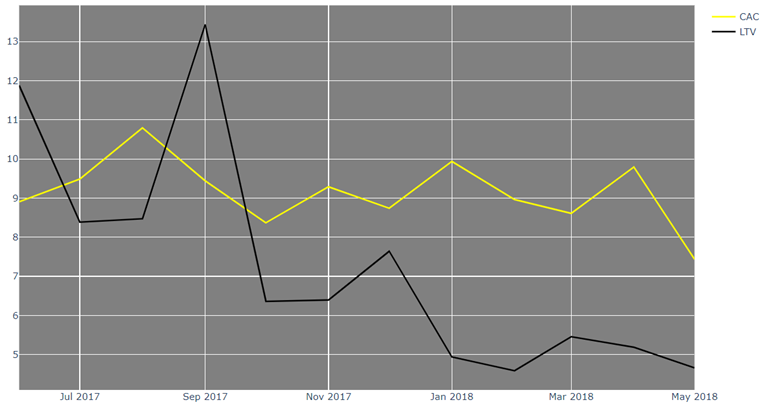

#### -High LTV value in June are most likely due to a high number of orders per customer, which also corresponds to a high return rate in the June cohort. Customers who came in June are more likely to return for their next purchases.

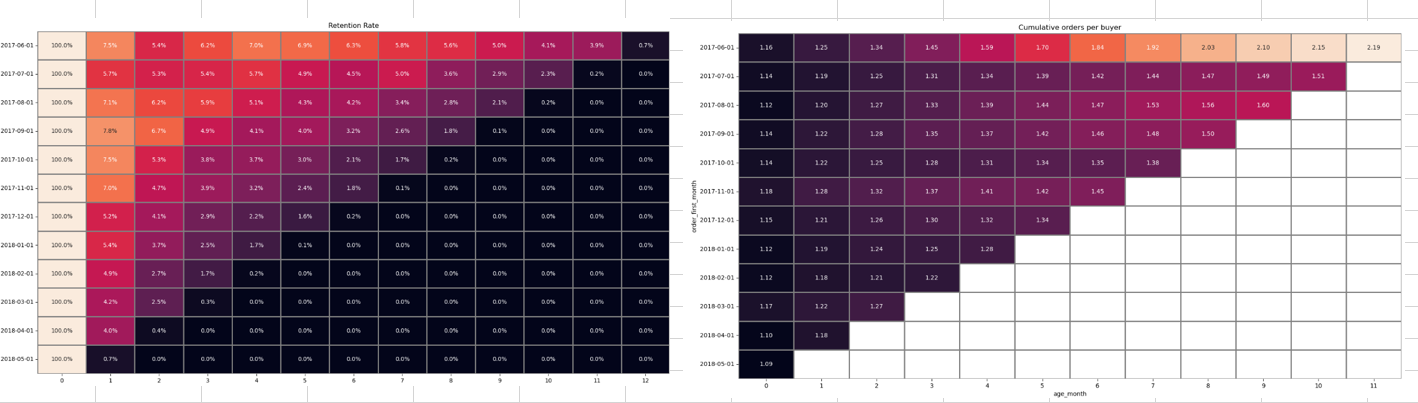

#### -LTV value in September are most likely due to the high average check in this cohort. Also note that in the December cohort the average check is also quite high, but it is likely that marketing costs in December exceed the high income. However, the month may be promising after revising costs for various sources 

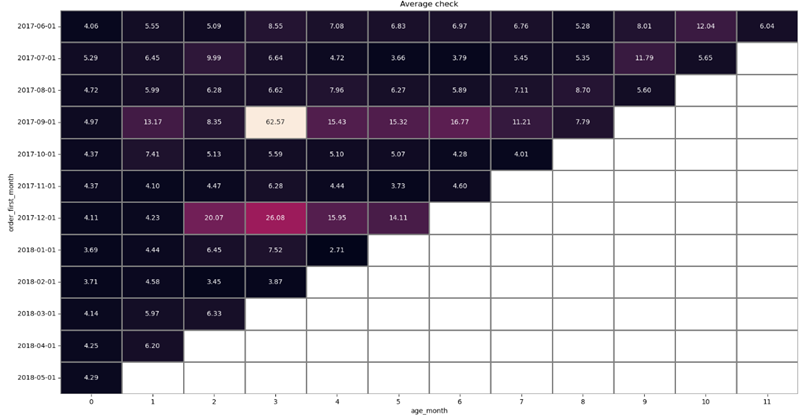

#### -Now let's look at the MAU and source costs per month charts. We are seeing an increase in active users from October to March and, considering that the amount of sessions is stable, we can assume than number of AU increase due to new users. Now look what happens with costs of different sources per month. The costs of the third source are themselves significantly higher than the costs of the others and increased sharply between October and March. So, we can assume that the clients attracted from it do not buy. Perhaps this source is not intended for our target audience, it should be closed first

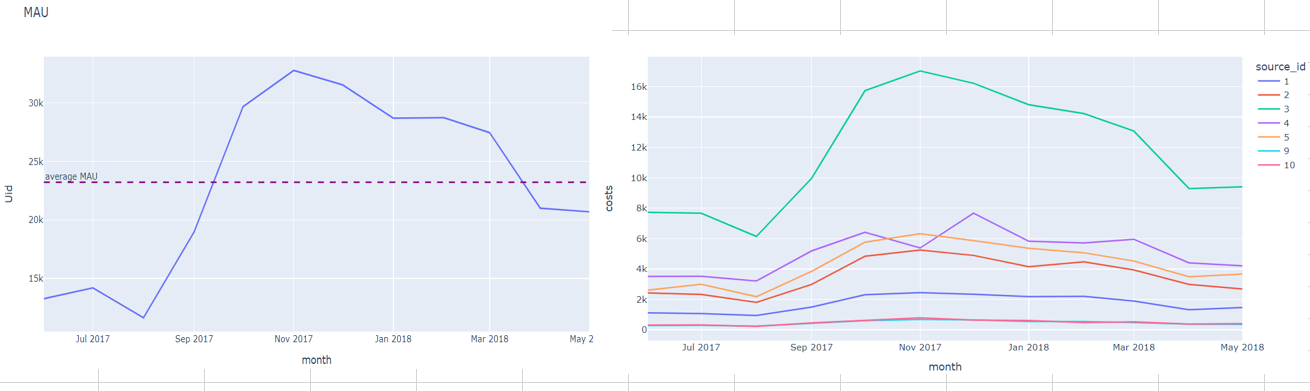

#### -Now lets see overall ROMI and ROMI per month  to understand which sources are unprofitable and redistribute costs. We see that, overall for the entire period , sources 1, 2 and 5 give a positive result. Judging by graphs 5 and 2, sources bring clients who make expensive purchases (in September and December, respectively), and the first – clients who make repeat purchases more often (as I wrote about this earlier).

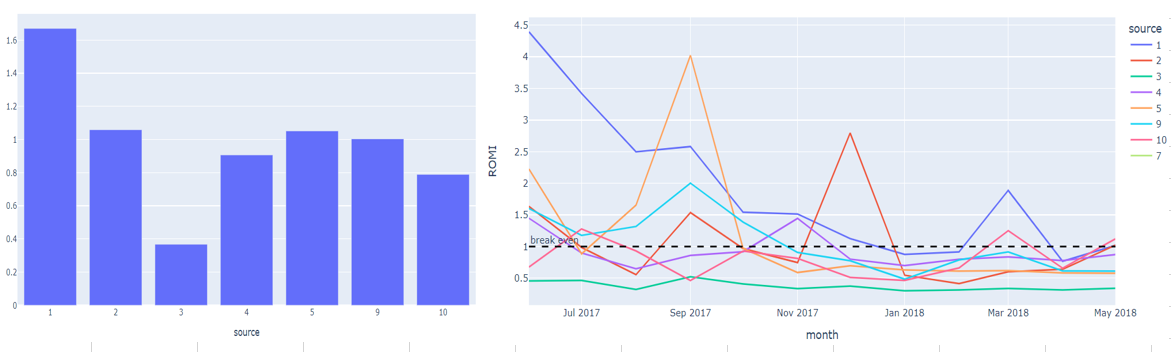

#### -Based on the above, I recommend to stop investing in sources 3,4,9 and 10 in favor of 1,2 and 5. According to the roughest calculations,  by closing funding for sources 3,4,10 and redistributing saved money equally between sources 1,2,5  we will increase ROI from 0.76 to 1.23 and revenue - almost 3 times.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Well done

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊